In [1]:
using Gadfly
using Interact

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.025,"inf_rate",0.025,0.001:0.001:0.05)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.25,"rec_rate",0.25,0.1:0.01:0.4)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.25,"sus_rate",0.25,0.1:0.01:0.4)

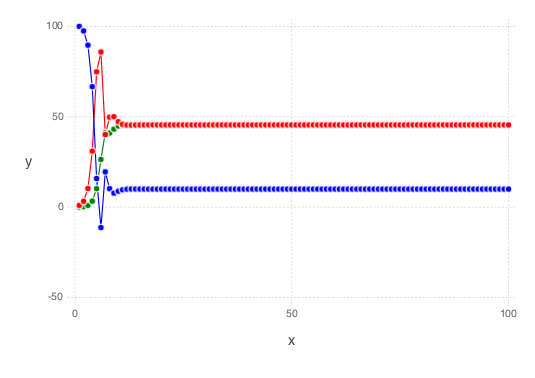

In [4]:
states = zeros(100,3)
@manipulate for inf_rate=0.001:0.001:0.05, rec_rate=0.1:0.01:0.4, sus_rate=0.1:0.01:0.4
    S = 100
    I = 1
    R = 0
    T = 100
    # inf_rate = 0.01
    # rec_rate = 0.27
    # sus_rate = 0.23
    states[1,:] = [S, I, R]  
    for t=2:T
        S = states[t-1,1]
        I = states[t-1,2]
        R = states[t-1,3]

        St = S - inf_rate*S*I + sus_rate*R
        It = I + inf_rate*S*I - rec_rate*I
        Rt = R + rec_rate*I - sus_rate*R
        states[t,:] = [St, It, Rt]
    end
    
    plot(layer( x=1:T, y=states[:,1],Geom.point, Geom.line, Theme(default_color=colorant"blue") ),
    layer( x=1:T, y=states[:,2],Geom.point, Geom.line, Theme(default_color=colorant"red") ),
layer( x=1:T, y=states[:,3],Geom.point, Geom.line, Theme(default_color=colorant"green") )
)
end

In [1]:
T = 20
states = zeros(T,2)
S0 = 100
I0 = 1
states[1,:] = [S0, I0]  
alp = 1.0
@manipulate for inf_rate=0.001:0.001:0.01, alp = 0.0:0.1:1.0

    for t=2:T
        S = states[t-1,1]
        I = states[t-1,2]

        St = max(S - inf_rate*(S - alp*S)*I - alp*S, 0)
        It = min(I + inf_rate*(S - alp*S)*I, S0)
        states[t,:] = [St, It]
    end
    
    plot(layer( x=1:T, y=states[:,1],Geom.point, Geom.line, Theme(default_color=colorant"blue") ),
    layer( x=1:T, y=states[:,2],Geom.point, Geom.line, Theme(default_color=colorant"red") )
)
end

LoadError: @manipulate not defined
while loading In[1], in expression starting on line 21

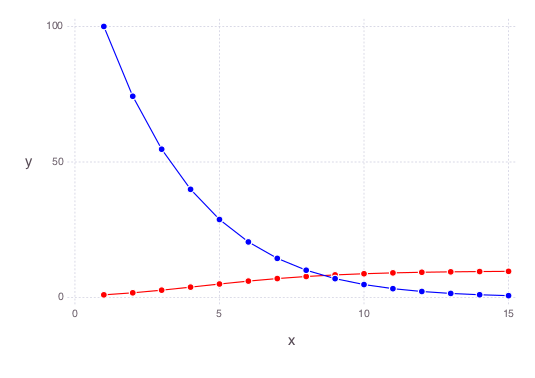

In [2]:
T = 15
states = zeros(T,2)
S0 = 100
I0 = 1
states[1,:] = [S0, I0]  
alp = 0.25
inf_rate = 0.01

for t=2:T
    S = states[t-1,1]
    I = states[t-1,2]

    St = max(S - inf_rate*(S - alp*S)*I - alp*S, 0)
    It = min(I + inf_rate*(S - alp*S)*I, S0)
    states[t,:] = [St, It]
end

plot(layer( x=1:T, y=states[:,1],Geom.point, Geom.line, Theme(default_color=colorant"blue") ),
layer( x=1:T, y=states[:,2],Geom.point, Geom.line, Theme(default_color=colorant"red") )
)


In [3]:
sum(states,1)

1x2 Array{Float64,2}:
 363.237  99.46

In [5]:
sum(states[2:end,2] - states[1:end-1,2])

8.665925599392299

In [6]:
states

15x2 Array{Float64,2}:
 100.0       1.0    
  74.25      1.75   
  54.713     2.72453
  39.9167    3.84254
  28.7872    4.9929 
  20.5124    6.07088
  14.4503    7.00484
  10.0786    7.76401
   6.97206   8.35089
   4.79237   8.78756
   3.27843   9.10341
   2.23499   9.32725
   1.51989   9.48359
   1.03181   9.5917 
   0.699634  9.66593